# Application of Machine Learning Methods to Analysis of Cyber-Sport Events
## Dmitry Savostyanov, 131

## Витрина данных по участникам Kiev Major

## Финальный файл скрипта: ABT_[DATE].csv

В данном скрипте представлена таблица по командам, которые указаны в файле Dota Features & Snippets - Roles.csv за период с 1 января 2017 года по сегодняшний день. Строка таблицы - информация о матче на уровне игрока. Т.е. если между IG и LGD был матч с match_id = 12345, то таблица содержит 10 записей с данным идентификаторм для каждого конкретного account_id.

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [1]:
# urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0D%0A%0D%0A%0D%0A--%20Basic%20table%0D%0Amatches.match_id%2C%0D%0Aplayer_matches.account_id%2C%0D%0Ateams.team_id%2C%0D%0Amatches.leagueid%2C%0D%0Aleagues.name%20leaguename%2C%0D%0Amatches.start_time%2C%0D%0Aplayer_matches.hero_id%2C%0D%0Aplayer_matches.player_slot%2C%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20true)%20radiant%2C%20--new%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20false)%20dire%2C%20--new%0D%0Aplayer_matches.kills%2C%0D%0Aplayer_matches.deaths%2C%0D%0Aplayer_matches.assists%2C%0D%0Aplayer_matches.gold_per_min%20%2C%0D%0Aplayer_matches.xp_per_min%20%2C%0D%0Aplayer_matches.gold_spent%20%2C%0D%0Aplayer_matches.hero_damage%20%2C%0D%0Aplayer_matches.tower_damage%20%2C%0D%0Aplayer_matches.stuns%20%2C%0D%0Aplayer_matches.creeps_stacked%20%2C%0D%0Aplayer_matches.camps_stacked%20%2C%0D%0Aplayer_matches.hero_healing%20%2C%0D%0Aplayer_matches.last_hits%2C%0D%0Aplayer_matches.denies%2C%0D%0Aplayer_matches.level%2C%0D%0Amatches.duration%2C%0D%0Amatches.cluster%2C%0D%0Amatches.first_blood_time%2C%0D%0A%0D%0A--timeStamp%20variables%0D%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0D%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0D%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0D%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0D%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0D%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0D%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0D%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0D%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0D%0A%0D%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0D%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0D%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0D%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0D%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0D%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0D%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0D%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0D%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0D%0A%0D%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0D%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0D%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0D%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0D%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0D%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0D%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0D%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0D%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0D%0A%0D%0Aplayer_matches.pings%20ping_log%2C%0D%0Aplayer_matches.obs_log%2C%0D%0Aplayer_matches.sen_log%2C%0D%0Aplayer_matches.runes_log%2C%0D%0Aplayer_matches.kills_log%2C%0D%0Aplayer_matches.buyback_log%2C%0D%0A%0D%0A--table_heroStats%0D%0Aheroes.localized_name%2C%0D%0Aheroes.attack_type%2C%0D%0Aheroes.primary_attr%2C%0D%0Aheroes.roles%20role_log%2C%0D%0A%0D%0A--purchase_log%0D%0Aplayer_matches.purchase_log%0D%0A%0D%0AFROM%20matches%0D%0AJOIN%20match_patch%20using(match_id)%0D%0AJOIN%20leagues%20using(leagueid)%0D%0AJOIN%20player_matches%20using(match_id)%0D%0ALEFT%20JOIN%20notable_players%20using(account_id)%0D%0ALEFT%20JOIN%20teams%20using(team_id)%0D%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0D%0A%0D%0AJOIN%0D%0A(%0D%0A%20%20%20%20SELECT%0D%0A%20%20%20%20%0D%0A%20%20%20%20DISTINCT%20matches.match_id%0D%0A%20%20%20%20%0D%0A%20%20%20%20FROM%20matches%0D%0A%20%20%20%20JOIN%20match_patch%20using(match_id)%0D%0A%20%20%20%20JOIN%20leagues%20using(leagueid)%0D%0A%20%20%20%20JOIN%20player_matches%20using(match_id)%0D%0A%20%20%20%20LEFT%20JOIN%20notable_players%20using(account_id)%0D%0A%20%20%20%20LEFT%20JOIN%20teams%20using(team_id)%0D%0A%20%20%20%20JOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0D%0A%20%20%20%20%0D%0A%20%20%20%20WHERE%20TRUE%0D%0A%20%20%20%20AND%20teams.team_id%20in%0D%0A%20%20%20%20%20%20%20%20(%0D%0A%20%20%20%20%20%20%20%20%20%205%2C%0D%0A%20%20%20%20%09%20%2026%2C%0D%0A%20%20%20%20%09%20%2039%2C%0D%0A%20%20%20%20%09%20%202163%2C%0D%0A%20%20%20%20%09%20%201375614%2C%0D%0A%20%20%20%20%09%20%201836806%2C%0D%0A%20%20%20%20%09%20%201883502%2C%0D%0A%20%20%20%20%09%20%202108395%2C%0D%0A%20%20%20%20%09%20%202512249%2C%0D%0A%20%20%20%20%09%20%202586976%2C%0D%0A%20%20%20%20%09%20%202640025%2C%0D%0A%20%20%20%20%09%20%202642171%2C%0D%0A%20%20%20%20%09%20%203326875%2C%0D%0A%20%20%20%20%09%20%203722973%2C%0D%0A%20%20%20%20%09%20%203580606%2C%0D%0A%20%20%20%20%09%20%203547682%2C%0D%0A%20%20%20%20%09%20%204253054%2C%0D%0A%20%20%20%20%09%20%204251435%2C%0D%0A%20%20%20%20%09%20%201838315%0D%0A%20%20%20%20%20%20%20%20)%0D%0A%20%20%20%20AND%20matches.start_time%20%3E%3D%201483218000%0D%0A%20%20%20%20ORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0D%0A%20%20%20%20LIMIT%201000%0D%0A)%20t1%20ON%20matches.match_id%20%3D%20t1.match_id%0D%0A%0D%0A%0D%0AWHERE%20TRUE%0D%0AAND%20teams.team_id%20!%3D%200%0D%0AAND%20matches.start_time%20%3E%3D%201483218000%0D%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST"

In [2]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0A%0A%0A--%20Basic%20table%0Amatches.match_id%2C%0Aplayer_matches.account_id%2C%0Ateams.team_id%2C%0Amatches.leagueid%2C%0Aleagues.name%20leaguename%2C%0Amatches.start_time%2C%0Aplayer_matches.hero_id%2C%0Aplayer_matches.player_slot%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20true)%20radiant%2C%20--new%0A((player_matches.player_slot%20%3C%20128)%20%3D%20false)%20dire%2C%20--new%0Aplayer_matches.kills%2C%0Aplayer_matches.deaths%2C%0Aplayer_matches.assists%2C%0Aplayer_matches.gold_per_min%20%2C%0Aplayer_matches.xp_per_min%20%2C%0Aplayer_matches.gold_spent%20%2C%0Aplayer_matches.hero_damage%20%2C%0Aplayer_matches.tower_damage%20%2C%0Aplayer_matches.stuns%20%2C%0Aplayer_matches.creeps_stacked%20%2C%0Aplayer_matches.camps_stacked%20%2C%0Aplayer_matches.hero_healing%20%2C%0Aplayer_matches.last_hits%2C%0Aplayer_matches.denies%2C%0Aplayer_matches.level%2C%0Amatches.duration%2C%0Amatches.cluster%2C%0Amatches.first_blood_time%2C%0A%0A--timeStamp%20variables%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0A%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0A%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0A%0Aplayer_matches.pings%20ping_log%2C%0Aplayer_matches.obs_log%2C%0Aplayer_matches.sen_log%2C%0Aplayer_matches.runes_log%2C%0Aplayer_matches.kills_log%2C%0Aplayer_matches.buyback_log%2C%0A%0A--table_heroStats%0Aheroes.localized_name%2C%0Aheroes.attack_type%2C%0Aheroes.primary_attr%2C%0Aheroes.roles%20role_log%2C%0A%0A--purchase_log%0Aplayer_matches.purchase_log%0A%0AFROM%20matches%0AJOIN%20match_patch%20using(match_id)%0AJOIN%20leagues%20using(leagueid)%0AJOIN%20player_matches%20using(match_id)%0ALEFT%20JOIN%20notable_players%20using(account_id)%0ALEFT%20JOIN%20teams%20using(team_id)%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0A%0AJOIN%0A(%0A%20%20%20%20SELECT%0A%20%20%20%20%0A%20%20%20%20DISTINCT%20matches.match_id%0A%20%20%20%20%0A%20%20%20%20FROM%20matches%0A%20%20%20%20JOIN%20match_patch%20using(match_id)%0A%20%20%20%20JOIN%20leagues%20using(leagueid)%0A%20%20%20%20JOIN%20player_matches%20using(match_id)%0A%20%20%20%20LEFT%20JOIN%20notable_players%20using(account_id)%0A%20%20%20%20LEFT%20JOIN%20teams%20using(team_id)%0A%20%20%20%20JOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0A%20%20%20%20%0A%20%20%20%20WHERE%20TRUE%0A%20%20%20%20AND%20teams.team_id%20in%0A%20%20%20%20%20%20%20%20(%0A%20%20%20%20%20%20%20%20%20%205%2C%0A%20%20%20%20%09%20%2026%2C%0A%20%20%20%20%09%20%2039%2C%0A%20%20%20%20%09%20%202163%2C%0A%20%20%20%20%09%20%201375614%2C%0A%20%20%20%20%09%20%201836806%2C%0A%20%20%20%20%09%20%201883502%2C%0A%20%20%20%20%09%20%202108395%2C%0A%20%20%20%20%09%20%202512249%2C%0A%20%20%20%20%09%20%202586976%2C%0A%20%20%20%20%09%20%202640025%2C%0A%20%20%20%20%09%20%202642171%2C%0A%20%20%20%20%09%20%203326875%2C%0A%20%20%20%20%09%20%203722973%2C%0A%20%20%20%20%09%20%203580606%2C%0A%20%20%20%20%09%20%203547682%2C%0A%20%20%20%20%09%20%204253054%2C%0A%20%20%20%20%09%20%204251435%2C%0A%20%20%20%20%09%20%201838315%0A%20%20%20%20%20%20%20%20)%0A%20%20%20%20AND%20matches.start_time%20%3E%3D%201483218000%0A%20%20%20%20ORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0A%20%20%20%20LIMIT%201000%0A)%20t1%20ON%20matches.match_id%20%3D%20t1.match_id%0A%0A%0AWHERE%20TRUE%0AAND%20teams.team_id%20!%3D%200%0A--AND%20matches.start_time%20%3E%3D%201483218000%0AAND%20matches.start_time%20%3E%3D%20extract(epoch%20from%20timestamp%20%272017-03-01T21%3A00%3A00.000Z%27)%0AAND%20matches.start_time%20%3C%3D%20extract(epoch%20from%20timestamp%20%272017-04-30T21%3A00%3A00.000Z%27)%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST"

# Загружаем данные в формате json, парсим и сохраняем в Pandas

Предварительно ссылку стоит открыть в браузере, иначе она не хочет грузиться (слишком большая?)

In [3]:
response = urllib2.urlopen(urlQuery)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)
matches = pd.DataFrame.from_dict(dictData['rows'])

# Добавляем уникальный идентификатор matchId_accountId и дату

In [4]:
matches['id'] = matches['match_id'].astype('str') + "_" + matches['account_id'].astype('str')
print matches.shape
matches['datetime'] = matches["start_time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d.%m.%Y %H:%M:%S'))

(5162, 68)


# Список переменных

In [5]:
list(matches)

[u'account_id',
 u'assists',
 u'attack_type',
 u'buyback_log',
 u'camps_stacked',
 u'cluster',
 u'creeps_stacked',
 u'deaths',
 u'denies',
 u'dire',
 u'duration',
 u'first_blood_time',
 u'gold_per_min',
 u'gold_spent',
 u'hero_damage',
 u'hero_healing',
 u'hero_id',
 u'kills',
 u'kills_log',
 u'last_hits',
 u'leagueid',
 u'leaguename',
 u'level',
 u'localized_name',
 u'match_id',
 u'obs_log',
 u'ping_log',
 u'player_slot',
 u'primary_attr',
 u'purchase_log',
 u'radiant',
 u'role_log',
 u'runes_log',
 u'sen_log',
 u'start_time',
 u'stuns',
 u't_experience_cnt_10',
 u't_experience_cnt_12',
 u't_experience_cnt_15',
 u't_experience_cnt_20',
 u't_experience_cnt_25',
 u't_experience_cnt_3',
 u't_experience_cnt_30',
 u't_experience_cnt_5',
 u't_experience_cnt_8',
 u't_gold_cnt_10',
 u't_gold_cnt_12',
 u't_gold_cnt_15',
 u't_gold_cnt_20',
 u't_gold_cnt_25',
 u't_gold_cnt_3',
 u't_gold_cnt_30',
 u't_gold_cnt_5',
 u't_gold_cnt_8',
 u't_lasthits_cnt_10',
 u't_lasthits_cnt_12',
 u't_lasthits_cnt_1

In [6]:
matches.head()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
0,94155156,18,Ranged,[],2.0,135,6.0,5,2,False,...,2.0,33.0,4.0,5.0,2586976,366,True,454,3149572447_94155156,30.04.2017 22:09:06
1,311360822,10,Ranged,"[{u'slot': 1, u'type': u'buyback_log', u'playe...",1.0,135,2.0,4,1,False,...,5.0,232.0,12.0,23.0,2586976,15885,True,617,3149572447_311360822,30.04.2017 22:09:06
2,26771994,12,Melee,[],0.0,135,0.0,6,2,False,...,0.0,48.0,0.0,2.0,2586976,22,True,317,3149572447_26771994,30.04.2017 22:09:06
3,41231571,14,Melee,[],0.0,135,0.0,7,25,False,...,4.0,154.0,14.0,28.0,2586976,1320,True,467,3149572447_41231571,30.04.2017 22:09:06
4,19672354,12,Melee,"[{u'slot': 4, u'type': u'buyback_log', u'playe...",3.0,135,8.0,7,6,False,...,7.0,175.0,20.0,45.0,2586976,293,True,629,3149572447_19672354,30.04.2017 22:09:06


In [7]:
matches.tail()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
5157,127077041,11,Ranged,[],2.0,154,6.0,7,7,False,...,1.0,59.0,4.0,10.0,3659536,391,False,326,3031875960_127077041,03.03.2017 13:01:35
5158,89603649,18,Ranged,[],0.0,154,0.0,7,1,True,...,2.0,44.0,3.0,5.0,3326875,404,True,348,3031875960_89603649,03.03.2017 13:01:35
5159,21289303,13,Melee,[],0.0,154,0.0,1,19,True,...,6.0,316.0,22.0,44.0,3326875,8937,True,603,3031875960_21289303,03.03.2017 13:01:35
5160,100471531,23,Melee,[],2.0,154,4.0,6,2,True,...,3.0,135.0,9.0,22.0,3326875,649,True,600,3031875960_100471531,03.03.2017 13:01:35
5161,85417034,21,Melee,[],0.0,154,0.0,5,0,True,...,1.0,47.0,1.0,5.0,3326875,410,True,415,3031875960_85417034,03.03.2017 13:01:35


# Parse Items Timing

In [8]:
t_item = dict()
itemList = [
            'blink',
            'power_treads',
            'ultimate_scepter',
            'phase_boots',
            'travel_boots',
            'blade_mail',
            'arcane_boots',
            'black_king_bar',
            'desolator',
            'magic_wand',
            'tranquil_boots',
            'invis_sword',
            'echo_sabre',
            'manta',
            'ring_of_aquila',
            'force_staff',
            'aether_lens',
            'wind_lace',
            'silver_edge',
            'hand_of_midas',
            'sphere',
            'boots',
            'hurricane_pike',
            'bottle'            
            ]
columnNames = ['id']

for item in itemList:
    columnNames.append("t_item_" + item)

items = pd.DataFrame(columns = columnNames)
    
for i in range(0, len(matches['purchase_log'])):
    
    purchaseList = matches['purchase_log'][i]     
    for item in itemList:
        columnName = "t_item_" + item
        t_item[columnName] = np.nan
        
    if purchaseList is not None:
        for purchase in purchaseList:
            for item in itemList:
                columnName = "t_item_" + item
                if purchase['key'] == item and purchase['time'] < 30*60:
                    t_item[columnName] = purchase['time']
                    unique_id = matches['match_id'][i].astype('str') + "_" + matches['account_id'][i].astype('str')
                    t_item['id'] = unique_id
        itemsRow = pd.DataFrame.from_dict(t_item, orient = 'index').transpose()
        items = items.append(itemsRow, ignore_index=True)           
    else: print "Line %s: Log does not exists" %i

Line 314: Log does not exists
Line 315: Log does not exists
Line 316: Log does not exists
Line 317: Log does not exists
Line 318: Log does not exists
Line 319: Log does not exists
Line 320: Log does not exists
Line 321: Log does not exists
Line 322: Log does not exists
Line 323: Log does not exists
Line 507: Log does not exists
Line 508: Log does not exists
Line 509: Log does not exists
Line 510: Log does not exists
Line 511: Log does not exists
Line 512: Log does not exists
Line 513: Log does not exists
Line 514: Log does not exists
Line 515: Log does not exists
Line 516: Log does not exists
Line 3922: Log does not exists
Line 3923: Log does not exists
Line 3924: Log does not exists
Line 3925: Log does not exists
Line 3926: Log does not exists
Line 3927: Log does not exists
Line 3928: Log does not exists
Line 3929: Log does not exists
Line 3930: Log does not exists


In [9]:
items.shape

(5133, 25)

In [10]:
matches = matches.merge(items, left_on='id', right_on='id', how='inner')
matches.shape

(5133, 93)

73 записи было удалено из таблицы в связи с отсутствием логов о покупках игроков.

# First Kill Timing (Время в секундах от старта первой пачки крипов)

In [12]:
for i in range(0, len(matches)):
    matches.loc[i, 't_first_kill'] = 0
    try:
        t_first_kill = matches['kills_log'][i][0]['time']
    except Exception:
        print "Line %s: Player has 0 kills" %i
    if t_first_kill is not None:
        matches.loc[i, 't_first_kill'] = t_first_kill

Line 18: Player has 0 kills
Line 27: Player has 0 kills
Line 35: Player has 0 kills
Line 45: Player has 0 kills
Line 49: Player has 0 kills
Line 57: Player has 0 kills
Line 75: Player has 0 kills
Line 111: Player has 0 kills
Line 145: Player has 0 kills
Line 162: Player has 0 kills
Line 172: Player has 0 kills
Line 175: Player has 0 kills
Line 176: Player has 0 kills
Line 213: Player has 0 kills
Line 221: Player has 0 kills
Line 239: Player has 0 kills
Line 240: Player has 0 kills
Line 242: Player has 0 kills
Line 253: Player has 0 kills
Line 256: Player has 0 kills
Line 257: Player has 0 kills
Line 262: Player has 0 kills
Line 313: Player has 0 kills
Line 316: Player has 0 kills
Line 318: Player has 0 kills
Line 323: Player has 0 kills
Line 324: Player has 0 kills
Line 326: Player has 0 kills
Line 327: Player has 0 kills
Line 365: Player has 0 kills
Line 381: Player has 0 kills
Line 395: Player has 0 kills
Line 407: Player has 0 kills
Line 409: Player has 0 kills
Line 410: Player has 

In [13]:
matches.shape

(5133, 94)

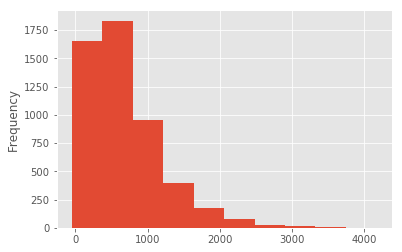

In [14]:
matches['t_first_kill'].plot(kind = 'hist')

# sen_log

In [15]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }

sen = pd.DataFrame(columns = [key for key, value in sen_cnt.items()])

for i in range(0, len(matches['sen_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0,
                't_sen_rpm_3':0,
                't_sen_rpm_5':0,
                't_sen_rpm_8':0,
                't_sen_rpm_10':0,
                't_sen_rpm_12':0,
                't_sen_rpm_15':0,
                't_sen_rpm_20':0,
                't_sen_rpm_25':0,
                't_sen_rpm_30':0    
                }
    try: 
        if matches['sen_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['sen_log'][i])):
                for timeStamp in timeStamps:
                    if matches['sen_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_sen_cnt_" + timeStamp
                        varName_rpm = "t_sen_rpm_" + timeStamp
                        sen_cnt[varName_cnt] += 1
                        sen_cnt[varName_rpm] += 1 / float(timeStamp)
            sen_cnt['id'] = matches['id'][i]
            senRow = pd.DataFrame.from_dict(sen_cnt, orient = 'index').transpose()
            sen = sen.append(senRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed


In [18]:
matches = matches.merge(sen, left_on='id', right_on='id', how='inner')
matches.shape

(5133, 112)

# Возникают новые записи в таблице, хотя используется inner join. С чем это может быть связано?

# obs_log

In [19]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }

obs = pd.DataFrame(columns = [key for key, value in obs_cnt.items()])

for i in range(0, len(matches['obs_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0,
                't_obs_rpm_3':0,
                't_obs_rpm_5':0,
                't_obs_rpm_8':0,
                't_obs_rpm_10':0,
                't_obs_rpm_12':0,
                't_obs_rpm_15':0,
                't_obs_rpm_20':0,
                't_obs_rpm_25':0,
                't_obs_rpm_30':0    
                }
    try: 
        if matches['obs_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['obs_log'][i])):
                for timeStamp in timeStamps:
                    if matches['obs_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_obs_cnt_" + timeStamp
                        varName_rpm = "t_obs_rpm_" + timeStamp
                        obs_cnt[varName_cnt] += 1
                        obs_cnt[varName_rpm] += 1 / float(timeStamp)
            obs_cnt['id'] = matches['id'][i]
            obsRow = pd.DataFrame.from_dict(obs_cnt, orient = 'index').transpose()
            obs = obs.append(obsRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed


In [22]:
matches = matches.merge(obs, left_on='id', right_on='id', how='inner')
print matches.shape

(5133, 130)


# runes_log

In [23]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }

runes = pd.DataFrame(columns = [key for key, value in runes_cnt.items()])

for i in range(0, len(matches['runes_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0,
                't_runes_rpm_3':0,
                't_runes_rpm_5':0,
                't_runes_rpm_8':0,
                't_runes_rpm_10':0,
                't_runes_rpm_12':0,
                't_runes_rpm_15':0,
                't_runes_rpm_20':0,
                't_runes_rpm_25':0,
                't_runes_rpm_30':0    
                }
    try:
        if matches['runes_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['runes_log'][i])):
                for timeStamp in timeStamps:
                    if matches['runes_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_runes_cnt_" + timeStamp
                        varName_rpm = "t_runes_rpm_" + timeStamp
                        runes_cnt[varName_cnt] += 1
                        runes_cnt[varName_rpm] += 1 / float(timeStamp)
            runes_cnt['id'] = matches['id'][i]
            runesRow = pd.DataFrame.from_dict(runes_cnt, orient = 'index').transpose()
            runes = runes.append(runesRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed


In [26]:
matches = matches.merge(runes, left_on='id', right_on='id', how='inner')
matches.shape  

(5133, 148)

# buyback_log

In [27]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }

buyback = pd.DataFrame(columns = [key for key, value in buyback_cnt.items()])

for i in range(0, len(matches['buyback_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0,
                't_buyback_rpm_3':0,
                't_buyback_rpm_5':0,
                't_buyback_rpm_8':0,
                't_buyback_rpm_10':0,
                't_buyback_rpm_12':0,
                't_buyback_rpm_15':0,
                't_buyback_rpm_20':0,
                't_buyback_rpm_25':0,
                't_buyback_rpm_30':0    
                }
    try: 
        if matches['buyback_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['buyback_log'][i])):
                for timeStamp in timeStamps:
                    if matches['buyback_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_buyback_cnt_" + timeStamp
                        varName_rpm = "t_buyback_rpm_" + timeStamp
                        buyback_cnt[varName_cnt] += 1
                        buyback_cnt[varName_rpm] += 1 / float(timeStamp)
            buyback_cnt['id'] = matches['id'][i]
            buybackRow = pd.DataFrame.from_dict(buyback_cnt, orient = 'index').transpose()
            buyback = buyback.append(buybackRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed


In [29]:
matches = matches.merge(buyback, left_on='id', right_on='id', how='inner')
matches.shape

(5133, 166)

In [28]:
buyback.shape

(5133, 19)

# Откуда 4000 новых записей после Join, при условии, что таблица buyback содержит 10908 записей?

# Hero statistics

In [30]:
urlHeroes = "https://api.opendota.com/api/heroStats"

In [31]:
response = urllib2.urlopen(urlHeroes)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)

In [32]:
heroesList = list()
heroAttr = [
            'id',
            'localized_name', 
            'attack_type',
            'pro_ban', 
            'pro_pick', 
            'pro_win', 
            'primary_attr', 
            'roles'
            ]
heroRolesList = [
                'Carry',
                'Disabler',
                'Initiator',
                'Jungler',
                'Support',
                'Durable',
                'Nuker',
                'Escape',
                'Pusher'
                ]

for heroId in range(0, len(dictData) - 1):    
    heroRaw = dict()
    
    for heroRole in heroRolesList:
        heroRaw[heroRole] = 0
    for key, value in dictData[heroId].iteritems():
        if key in heroAttr:
            heroRaw[key] = dictData[heroId][key]
            if key == 'roles':
                for heroRole in dictData[heroId][key]:
                    heroRaw[heroRole] = 1
    del heroRaw['roles']                
    heroesList.append(heroRaw)

In [33]:
heroes = pd.DataFrame(heroesList)
print heroes.shape
heroes.head()

(112, 16)


,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type,id,localized_name,primary_attr,pro_ban,pro_pick,pro_win
0,1,0,0,1,0,0,1,0,0,Melee,1,Anti-Mage,agi,51.0,54.0,26.0
1,0,1,1,0,1,1,0,0,0,Melee,2,Axe,str,188.0,171.0,92.0
2,0,1,1,0,0,0,1,0,1,Ranged,3,Bane,int,1.0,15.0,9.0
3,1,1,0,0,1,1,1,0,0,Melee,4,Bloodseeker,agi,6.0,11.0,6.0
4,0,1,0,0,0,1,1,0,1,Ranged,5,Crystal Maiden,int,93.0,466.0,264.0


# Возможно косяк здесь, потому что есть по 4 записи на команду, а не 5

In [65]:
matches.groupby(['team_id', 'match_id'], as_index=False).count()

,team_id,match_id,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,3,3032935500,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,3,3033038349,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,3,3033099678,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,3,3033148738,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3049748374,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,3,3051959931,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,3,3052019206,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,3,3053852703,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,3,3053886651,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,5,3047642996,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [35]:
matches= matches.merge(heroes, left_on = 'hero_id', right_on = 'id', how = 'inner')
matches.shape

(4983, 182)

# EXP_RPM

In [66]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'experience'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# GOLD_RPM

In [67]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'gold'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# LASTHITS_RPM

In [68]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'lasthits'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

In [69]:
for col in list(matches):
    print col

account_id
assists
attack_type_x
buyback_log
camps_stacked
cluster
creeps_stacked
deaths
denies
dire
duration
first_blood_time
gold_per_min
gold_spent
hero_damage
hero_healing
hero_id
kills
kills_log
last_hits
leagueid
leaguename
level
localized_name_x
match_id
obs_log
ping_log
player_slot
primary_attr_x
purchase_log
radiant
role_log
runes_log
sen_log
start_time
stuns
t_experience_cnt_10
t_experience_cnt_12
t_experience_cnt_15
t_experience_cnt_20
t_experience_cnt_25
t_experience_cnt_3
t_experience_cnt_30
t_experience_cnt_5
t_experience_cnt_8
t_gold_cnt_10
t_gold_cnt_12
t_gold_cnt_15
t_gold_cnt_20
t_gold_cnt_25
t_gold_cnt_3
t_gold_cnt_30
t_gold_cnt_5
t_gold_cnt_8
t_lasthits_cnt_10
t_lasthits_cnt_12
t_lasthits_cnt_15
t_lasthits_cnt_20
t_lasthits_cnt_25
t_lasthits_cnt_3
t_lasthits_cnt_30
t_lasthits_cnt_5
t_lasthits_cnt_8
team_id
tower_damage
win
xp_per_min
id_x
datetime
t_item_aether_lens
t_item_arcane_boots
t_item_black_king_bar
t_item_blade_mail
t_item_blink
t_item_boots
t_item_bottle
t

# Заметка: после join появляются id_x и id_y - айдишники правых и левых таблиц

In [70]:
print matches['id_x'].unique().size

4983


In [71]:
print matches['id_y'].unique().size

111


# Используем id_x в качестве уникального id.
Аналог SQL select distinct id_x from matches (Удаляем дубликаты)

In [72]:
matches.drop_duplicates(subset = 'id_x', inplace = True)

In [73]:
matches.shape

(4983, 209)

In [74]:
matchesWithoutLogs = matches.drop(labels = ['buyback_log', 'kills_log', 'obs_log', 'ping_log', 'purchase_log', 'role_log', 'runes_log', 'sen_log'], axis = 1)

In [75]:
matchesWithoutLogs.to_csv('ABT_05_05_2017.csv', na_rep = 'NaN', sep = ';')